In [6]:
# Cell 1: Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# For demonstration, let's create a sample Academic Performance dataset
data = {
    'Student_ID': [1, 2, 3, 4, 5, 6, 7, 8],
    'Age': [20, 21, np.nan, 22, 20, 23, 24, 100],  # 100 is an outlier
    'CGPA': [7.5, 8.0, 8.2, np.nan, 6.9, 9.1, 10.0, 4.0],
    'Study_Hours': [2, 3, 4, 5, np.nan, 3, 10, 1]
}
df = pd.DataFrame(data)
df

,Student_ID,Age,CGPA,Study_Hours
0,1,20.0,7.5,2.0
1,2,21.0,8.0,3.0
2,3,NaN,8.2,4.0
3,4,22.0,NaN,5.0
4,5,20.0,6.9,NaN
5,6,23.0,9.1,3.0
6,7,24.0,10.0,10.0
7,8,100.0,4.0,1.0


In [7]:
# Cell 2: Checking for Missing Values
print("Missing Values:\n", df.isnull().sum())

# Handling missing values: Fill Age with median, CGPA with mean, Study_Hours with mean
df['Age'] = df['Age'].fillna(df['Age'].median())
df['CGPA'] = df['CGPA'].fillna(df['CGPA'].mean())
df['Study_Hours'] = df['Study_Hours'].fillna(df['Study_Hours'].mean())

print("\nAfter handling missing values:\n", df)

Missing Values:
 Student_ID     0
Age            1
CGPA           1
Study_Hours    1
dtype: int64

After handling missing values:
    Student_ID    Age       CGPA  Study_Hours
0           1   20.0   7.500000          2.0
1           2   21.0   8.000000          3.0
2           3   22.0   8.200000          4.0
3           4   22.0   7.671429          5.0
4           5   20.0   6.900000          4.0
5           6   23.0   9.100000          3.0
6           7   24.0  10.000000         10.0
7           8  100.0   4.000000          1.0


In [8]:
# Cell 3: Checking for Outliers (IQR Method)
for col in ['Age', 'CGPA']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(f"\nOutliers in {col}:\n", outliers[[col]])

    # Cap outliers
    df[col] = np.where(df[col] > upper, upper, df[col])
    df[col] = np.where(df[col] < lower, lower, df[col])

print("\nAfter handling outliers:\n", df)


Outliers in Age:
      Age
7  100.0

Outliers in CGPA:
    CGPA
7   4.0

After handling outliers:
    Student_ID   Age       CGPA  Study_Hours
0           1  20.0   7.500000          2.0
1           2  21.0   8.000000          3.0
2           3  22.0   8.200000          4.0
3           4  22.0   7.671429          5.0
4           5  20.0   6.900000          4.0
5           6  23.0   9.100000          3.0
6           7  24.0  10.000000         10.0
7           8  27.0   5.737500          1.0


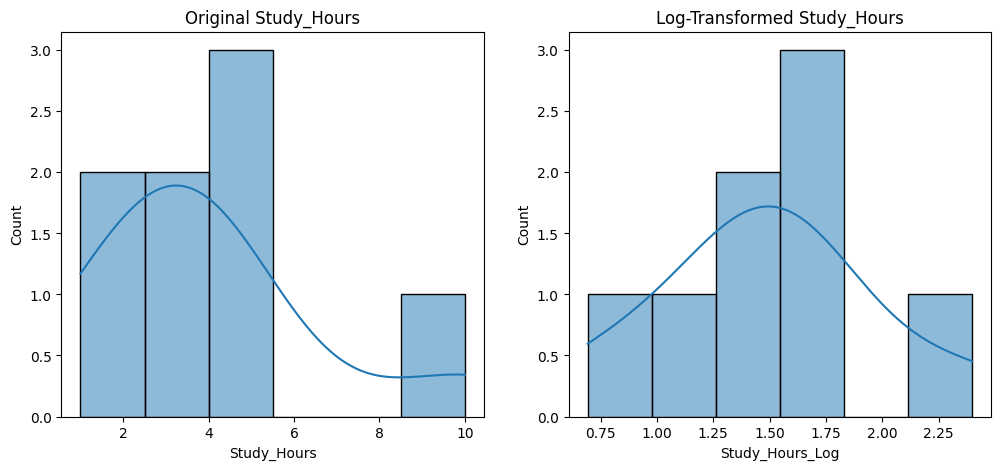

In [9]:
# Cell 4: Data Transformation (Log Transform Study_Hours)
df['Study_Hours_Log'] = np.log1p(df['Study_Hours'])

# Plot before and after transformation
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['Study_Hours'], kde=True)
plt.title('Original Study_Hours')

plt.subplot(1,2,2)
sns.histplot(df['Study_Hours_Log'], kde=True)
plt.title('Log-Transformed Study_Hours')

plt.show()

In [10]:
# Cell 5: (Optional) Standard Scaling
scaler = StandardScaler()
df[['Age_Scaled', 'CGPA_Scaled']] = scaler.fit_transform(df[['Age', 'CGPA']])
df

,Student_ID,Age,CGPA,Study_Hours,Study_Hours_Log,Age_Scaled,CGPA_Scaled
0,1,20.0,7.500000,2.0,1.098612,-1.091521,-0.319473
1,2,21.0,8.000000,3.0,1.386294,-0.631933,0.091566
2,3,22.0,8.200000,4.0,1.609438,-0.172345,0.255982
3,4,22.0,7.671429,5.0,1.791759,-0.172345,-0.178545
4,5,20.0,6.900000,4.0,1.609438,-1.091521,-0.812719
5,6,23.0,9.100000,3.0,1.386294,0.287242,0.995852
6,7,24.0,10.000000,10.0,2.397895,0.746830,1.735722
7,8,27.0,5.737500,1.0,0.693147,2.125594,-1.768385
